
# Project: TMDB Movies Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

I have chosen the TMDB Movies dataset to carry full analysis upon and drive conclusions based on the analysis in this notebook.

The TMDB Movies dataset contains about 10,000 movie records gathered from The Movie Database (TMDb), including user ratings and revenue.

### Overview

The dataset consists of 10866 rows and 21 columns, with certain columns containing multiple values seperated by pipe (|) characters such as the 'cast' and 'genres' columns.


The following questions are going to be answered through the analysis of the given dataset:

Question 1. Which genres are most popular from year to year? 

Question 2. What is the average movies runtime from year to year?

Question 3. What is the most popular movie lengths?

Question 4. What is the average movies' revenue?

In [147]:
#import statements 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

Cleaning the dataset and preparing it for EDA by dropping columns that are not required or irrelevant to the analysis, removing duplicates and checking for missing data.

This step lays the foundation of the analysis to produce a more organized and easy dataset to carry the analysis upon.

### General Properties

In [148]:
# Load the dataset into a pandas dataframe
# print out the first five rows of the dataframe. 
df=pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [149]:
df.tail()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NaN,Bruce Brown,NaN,...,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966,0.000000,0.0
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,...,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966,0.000000,0.0
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000,0.0
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000,0.0
10865,22293,tt0060666,0.035919,19000,0,Manos: The Hands of Fate,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,NaN,Harold P. Warren,It's Shocking! It's Beyond Your Imagination!,...,A family gets lost on the road and stumbles up...,74,Horror,Norm-Iris,11/15/66,15,1.5,1966,127642.279154,0.0


In [150]:
df.shape

(10866, 21)

In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

# Notes
First step to inspect the data types and look for instances of missing or possibly errant data. 

Familiarize with the dataset we are working on to get the sense of each column and the data it hold.

Numerical columns contain zero values that would cause inaccuracy in our analysis, therfore they should be dropped as NAN.

Some columns would not be required in our analysis and would be dropped to carry our first steps to produce a clean version of the dataset.

Lastly, we might need to change the data type of one or more variables before moving forward with the analysis.

### Data cleaning

Columns identified as irrelevant and to be dropped:
id, imdb_id, popularity, homepage, keywords, overview, production_companies, vote_vount, vote_average, budget_adj and revenue_adj

Check and remove duplicates

Check for missing and unreasonable data and drop them accordingly

changing formats for budget, release_date and revenue columns

In [152]:
#Dropping irrelevant columns and creating a new df
df_edit=df.drop(['id', 'imdb_id', 'homepage', 'tagline', 'keywords', 'overview', 'production_companies', 'vote_count', 'vote_average', 'budget_adj', 'revenue_adj'],axis=1)

In [153]:
df_edit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 10 columns):
popularity        10866 non-null float64
budget            10866 non-null int64
revenue           10866 non-null int64
original_title    10866 non-null object
cast              10790 non-null object
director          10822 non-null object
runtime           10866 non-null int64
genres            10843 non-null object
release_date      10866 non-null object
release_year      10866 non-null int64
dtypes: float64(1), int64(4), object(5)
memory usage: 849.0+ KB


In [154]:
df_edit.duplicated().sum()

1

Only a single row is duplicated in the entire dataset

In [155]:
#Display duplicated rows
df_edit[df.duplicated()]

,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,release_year
2090,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,Dwight H. Little,92,Crime|Drama|Action|Thriller|Science Fiction,3/20/10,2010


In [156]:
#Remove duplicated entries
df_edit.drop_duplicates(inplace=True)

In [157]:
#Checking 
df_edit.duplicated().sum()

0

After successfully dropping duplicates, further inspection is required to make sure the data is ready, that is checking for nulls and errant data.

In [158]:
#checking for nulls
df_edit.isnull().sum()

popularity         0
budget             0
revenue            0
original_title     0
cast              76
director          44
runtime            0
genres            23
release_date       0
release_year       0
dtype: int64

Before dropping null records, there might be more irrelevant entries that requires to be dropped.

In [159]:
df_edit.shape

(10865, 10)

In [160]:
#Checking for zero values in the numeric data
col=['budget','revenue']
df_edit[col]=df_edit[col].replace(0,np.NAN)
df_edit.dropna(subset=col,inplace=True)

In [161]:
df_edit['runtime']=df_edit['runtime'].replace(0,np.NAN)

In [162]:
df_edit.isnull().sum()

popularity        0
budget            0
revenue           0
original_title    0
cast              4
director          1
runtime           0
genres            0
release_date      0
release_year      0
dtype: int64

In [163]:
df_edit.tail()

,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,release_year
10822,0.670274,7500000.0,33736689.0,Who's Afraid of Virginia Woolf?,Elizabeth Taylor|Richard Burton|George Segal|S...,Mike Nichols,131,Drama,6/21/66,1966
10828,0.402730,3000000.0,13000000.0,Torn Curtain,Paul Newman|Julie Andrews|Lila Kedrova|HansjÃ¶...,Alfred Hitchcock,128,Mystery|Thriller,7/13/66,1966
10829,0.395668,4653000.0,6000000.0,El Dorado,John Wayne|Robert Mitchum|James Caan|Charlene ...,Howard Hawks,120,Action|Western,12/17/66,1966
10835,0.299911,12000000.0,20000000.0,The Sand Pebbles,Steve McQueen|Richard Attenborough|Richard Cre...,Robert Wise,182,Action|Adventure|Drama|War|Romance,12/20/66,1966
10848,0.207257,5115000.0,12000000.0,Fantastic Voyage,Stephen Boyd|Raquel Welch|Edmond O'Brien|Donal...,Richard Fleischer,100,Adventure|Science Fiction,8/24/66,1966


Confirming the removal of zero values and replacing them with NANs before dropping the missing values from our dataset in order to move forward with our analysis

In [164]:
df_edit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3854 entries, 0 to 10848
Data columns (total 10 columns):
popularity        3854 non-null float64
budget            3854 non-null float64
revenue           3854 non-null float64
original_title    3854 non-null object
cast              3850 non-null object
director          3853 non-null object
runtime           3854 non-null int64
genres            3854 non-null object
release_date      3854 non-null object
release_year      3854 non-null int64
dtypes: float64(3), int64(2), object(5)
memory usage: 331.2+ KB


# Note

After cleaning and dropping irrelevant columns, duplicated rows, and converting zero values to NANs, the remaining part of the dataset dropped from about 10 thousand entries/movies down to 3854 entries.

In [165]:
#Converting formats
col=['budget', 'revenue']
df_edit[col]=df_edit[col].applymap(np.int64)
df_edit.release_date=pd.to_datetime(df_edit['release_date'])

In [166]:
#Confirming data types were successfully changed.
df_edit.dtypes

popularity               float64
budget                     int64
revenue                    int64
original_title            object
cast                      object
director                  object
runtime                    int64
genres                    object
release_date      datetime64[ns]
release_year               int64
dtype: object

Converting data types to the right formats to facilitate the analysis process ahead.

<a id='eda'></a>
## Exploratory Data Analysis

After cleaning the data, we will start our dataset exploration. Compute interesting statistics and create visualizations with the goal of addressing the research questions discussed in the Introduction section.


### Question 1 Which genres are most popular from year to year?

In [167]:
#Create genre list
genre_details = list(map(str,(df_edit['genres'])))
genre = ['Adventure', 'Science Fiction', 'Fantasy', 'Crime', 'Western', 'Family','nan', 'Animation','War','Mystery','Romance','TV Movie','Action', 'Thriller','Comedy','Drama' , 'History', 'Music', 'Horror', 'Documentary', 'Foreign']

In [168]:
#Create arrays of year and popularity
year = np.array(df_edit['release_year'])
popularity = np.array(df_edit['popularity'])

In [169]:
#Create the popular_genre dataframe to visualize
df_popular_genre = pd.DataFrame(index = genre, columns = range(1960, 2016))

In [170]:
#Fill NAN values.
df_popular_genre = df_popular_genre.fillna(value = 0.0)

In [171]:
index = 0
#Loop through the genre list to split its content and remove unusual characters
for i in genre_details:
    genre_list = list(map(str,i.split('|')))
    df_popular_genre.loc[genre_list, year[index]] = df_popular_genre.loc[genre_list, year[index]] + popularity[index]
    index+=1

The genre required further cleaning in order to remove the pole ('|') character and split each genre to a list to accurately represent the data.

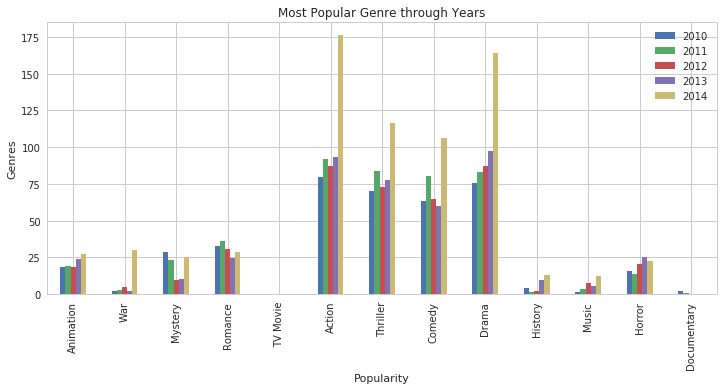

In [172]:
#visualize genra popularity through a bar plot
df_popular_genre.iloc[7:20,50:55].plot(kind='bar',figsize = (12,5))

#setup the title and labels of the plot.
plt.title("Most Popular Genre through Years")
plt.xlabel("Popularity")
plt.ylabel("Genres")
sns.set_style("whitegrid")

The graph above illustrates the information required to answer the question presented on which genres are most popular on the year to year basis showing that the Drama genre is the most popular one while Action, Comedy and Thriller genres are trailing.

### Question 2. What is the average movies runtime from year to year?

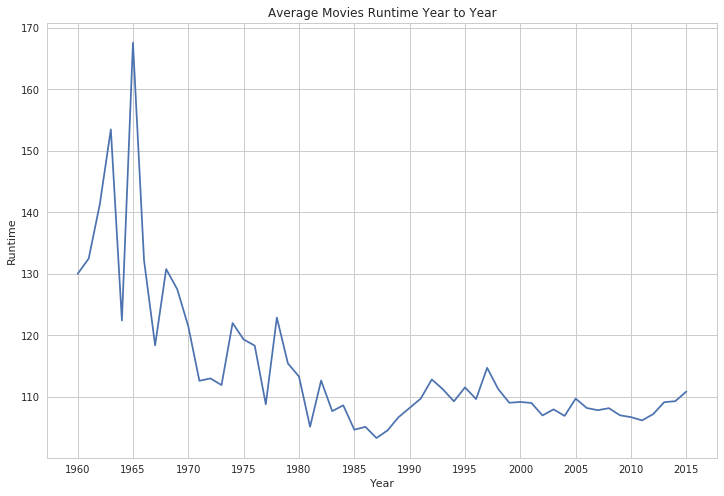

In [173]:
#Groupby release_year's and runtime and calculate the mean and visualizing the results.
df_edit.groupby('release_year').mean()['runtime'].plot(figsize = (12,8),xticks = np.arange(1960,2020,5))

#Title and graph labels

plt.title("Average Movies Runtime Year to Year")

plt.xlabel('Year')
plt.ylabel('Runtime')

#Better visualization of the graph
sns.set(rc={'figure.figsize':(10,10)})
sns.set_style("whitegrid")

The graph clearly illustrates the negative correlation between the runtime and years. However, it shows a steady fluctuations around the 110 minutes of runtime in the last 2 and half decades.

### Question 3 : What is the most popular movie lengths?

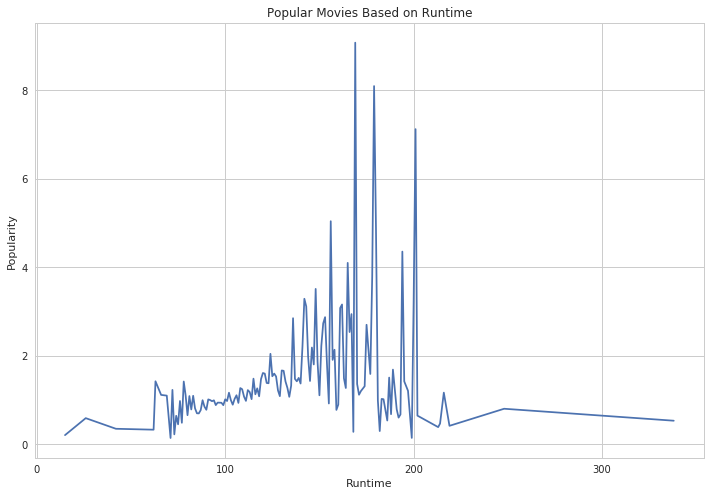

In [174]:
#Groupby runtime and popularity's mean
df_edit.groupby('runtime')['popularity'].mean().plot(figsize = (12,8),xticks=np.arange(0,400,100))

#Title and graph labels
plt.title("Popular Movies Based on Runtime")


plt.xlabel('Runtime')
plt.ylabel('Popularity')

#Better visualize the graph
sns.set(rc={'figure.figsize':(12,8)})
sns.set_style("whitegrid")

From the above visualization, we can deduct that movies within the range starting from 75 to 200 are the most popular ones.

This could have been easily guessed since movies out of this range would be either too short or a boring long movie, which in both cases most likely is going to receive lots of negative votes.

### Question 4 What is the average movies' revenue?

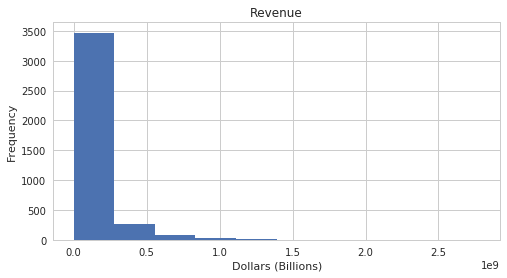

In [175]:
#Histogram plot to investigate revenue
df_edit['revenue'].plot(kind='hist',figsize = (8,4));

#Title and graph labels
plt.title("Revenue")
#Revenue currency assumed to be dollars
plt.xlabel("Dollars (Billions)")
plt.ylabel("Frequency")

#Better visualize the graph
sns.set_style("whitegrid")

By investigating the revenue column in the dataset and plotting a histogram, we can conclude that the data is right skewed with the majority of the data concentrated around half billion dollars

<a id='conclusions'></a>
## Conclusions

1.Drama movies are the most popular ones amongst the other genres.

2.The average movie runtime has decreased over the years with a current average of 110 minutes.

3.Popular movies range between 75 to 200 minutes of runtime.

## Limitations

The code runtime is above average at the visualization cell of the popular genre cell due to the fact that the genre column required extra cleaning during the process.